# Basic probability

Python activities to complement Measurements and their Uncertainties, Chapter 3, "Uncertainties as probabilities." 

Author: J. S. Dodge, 2019

* [Preliminaries](#Preliminaries)
* [Probability calculations](#Probability-calculations)
    * [Probability calculations with the uniform distribution](#Probability-calculations-with-the-uniform-distribution)
        * [Programming notes 1](#Programming-notes-1)
        * [Programming notes 2](#Programming-notes-2)
    * [Probability calculations with the normal distribution](#Probability-calculations-with-the-normal-distribution)
* [Outliers: Chauvenet is dead. Let his criterion die with him.](#Outliers&#58;-Chauvenet-is-dead.-Let-his-criterion-die-with-him.)
* [The Poisson distribution](#The-Poisson-distribution)
* [The central limit theorem](#The-central-limit-theorem)
* [Summary](#Summary)
* [Further reading](#Further-reading)

## Preliminaries
Before proceeding with this notebook you should review the topics from the [previous notebook](2.0-Basic-statistics.ipynb) and read *MU* Ch. 3, "Uncertainties as probabilities," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Uncertainties_as_probabilities) in mind.

1. Be able to explain what a probability distribution function $P_\text{DF}(x)$ represents and why Eqs. (3.1) - (3.6) follow from its definition.
2. Be able to recall and use Eqs. (3.1) - (3.3) to perform simple probability calculations for an arbitrary $P_\text{DF}(x)$, including:
    1. Check that $P_\text{DF}(x)$ is properly normalized, and identify the correct normalization factor if it is not;
    2. Evaluate the expectation value of a function $f(x)$; and
    3. Evaluate the expectation value of the mean and the variance.
3. Be able to recall the definitions (3.7) and (3.8) of the Gaussian probability distribution function and the error function, respectively, and know how to use the error function in simple probability calculations like the one given in Sec. 3.2.2.
4. Be aware of the rules described in Sec. 3.3.2 for rejecting outliers, be able to follow a well-defined procedure for doing so, and be able to suggest alternatives to throwing away data points.
5. Be able to describe the basic properties of a Poisson distribution $P(N;\bar{N})$, including:
    1. its functional form;
    2. the kind of experimental data that will be described by it;
    3. the expectation values of its mean and variance; and
    4. the Gaussian probability distribution that approximates it for $N\rightarrow\infty$.
6. Be able to sketch a Poisson distribution for a given mean and standard deviation, and be able to estimate the mean and standard deviation from the plot of a Poisson distribution.
7. Be able to state the central limit theorem and recognize how it is used to justify the assumption of Gaussian errors in many experiments.

The following code cell includes the usual initialization commands, updated to load the normal distribution object `norm`.

In [ ]:
import numpy as np
from numpy import random
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

## Probability calculations
*MU* Sec. 3.1 lists three integral expressions that describe important properties of a continuous PDF.

Eq. (3.1) is a *normalization condition* that ensures that the probability summed over all possible outcomes is one:

<a id="MU(3.1)"></a>$$ \int_{-\infty}^{\infty}\text{d}x\,P_\text{DF}(x) = 1.$$

Eq. (3.2) allows us to predict the probabilities of specific outcomes:

<a id="MU(3.2)"></a>$$P(x_1 \le x \le x_2) = \int_{x_1}^{x_2}\text{d}x\,P_\text{DF}(x).$$

Eq. (3.3) expresses the *expectation* of $x^n$, given by the weighted average

<a id="MU(3.3)"></a>$$ \left\langle x^n\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,x^n P_\text{DF}(x), $$

where we use the $\langle x^n\rangle$ notation discussed in the [previous notebook](2.0-Basic-statistics.ipynb#Determining-the-mean-and-variance-from-the-distribution) instead of the overbar notation $\overline{x^n}$. This quantity is also called the $n$th moment of $x$.

We can also generalize Eq. (3.3) to describe the expectation of an arbitrary *function*, $f(x)$,

<a id="<f(x)>"></a>$$ \left\langle f(x)\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,f(x) P_\text{DF}(x). $$

Finally, *MU* Eq. (3.6) gives a useful identity, proven in *MU* Eq. (3.5),

<a id="MU(3.6)"></a>$$ \sigma^2 = \langle(x-\mu)^2\rangle = \langle x^2\rangle - \langle x\rangle^2. $$

Usually we will evaluate these expressions numerically, not analytically, and there are several SciPy routines to help with this.

### Probability calculations with the uniform distribution
The uniform distribution is appropriate for measurements with discrete precision (see *MU*, Sec. 1.3.2), and you evaluated the integral in *MU* Eq. (3.2) by hand for the standard uniform distribution $\mathcal{U}(x;0,1)$ in [Exercise  3](2.0-Basic-statistics.ipynb#Exercise-3) of the last notebook. The following code cell shows how to do this numerically for $P(0.0 \le x \le 0.5)$.

#### Programming notes 1
The first line imports the [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) distribution object from [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html), and the second line imports [`quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html), which is short for [quadrature](https://en.wikipedia.org/wiki/Quadrature_(mathematics)), from [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html). The `quad` routine returns two numbers: the value of the integral, assigned here to `P`, and an estimate of its absolute error, assigned to `P_err`.

In [15]:
from scipy.stats import uniform
from scipy.integrate import quad

P, P_err = quad(uniform.pdf, 0.0, 0.5)
print("P = ", P)
print("P_err = ", int_err)

P =  0.5
P_err =  5.551115123125783e-15


In the next code cell we compute the mean by evaluating *MU* Eq. (3.4),

<a id="MU(3.4)"></a>$$ \left\langle x\right\rangle = \int_{-\infty}^{\infty}\text{d}x\,x \mathcal{U}(x;0,1). $$

We then compute the second moment by evaluating [*MU* Eq. (3.3)](#MU(3.3)) with $n=2$, and the variance by evaluating [*MU* Eq. (3.6)](#MU(3.6)).

#### Programming notes 2
The `quad` routine requires a [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) of a single argument to integrate, which we define in the first two statements below. It has the structure

    def <name>(<input args>):
        <intermediate statements>
        return <output args>

Here, the function *name* is `mean_int`, and it has a single input argument `x`. This is a simple function, so we do not need to include any intermediate statements; we just `return` the single output argument given by `x*uniform.pdf(x)`.

In [46]:
# Define integrand for the mean
def mean_int(x):
    return  x*uniform.pdf(x)

# Integrate over domain and print result
xbar, xbar_err  =  quad(mean_int, 0.0, 1.0)
print("Mean: ", xbar)

# Repeat for the second moment
def m2_int(x):
    return  x**2*uniform.pdf(x)

m2, m2_err  =  quad(m2_int, 0.0, 1.0)
print("Second moment: ", m2)

# Repeat for the variance
def var_int(x):
    return  (x - 0.5)**2*uniform.pdf(x)

var, var_err  =  quad(var_int, 0.0, 1.0)
print("Variance: ", var)

Mean:  0.5
Second moment:  0.33333333333333337
Variance:  0.08333333333333333


#### Programming notes 3
The `scipy.stats` package also includes [methods](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#common-methods) for simple statistics like these, as demonstrated in the next code cell. The `mean`, `std`, and `var` methods are listed at the end of the help file for the [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html) distribution object, and you can use `?` to get additional help for each of them. For example, type `uniform.mean?` in a new code cell to see the help for `mean`.

In [60]:
# Get mean, std, var, and 2nd moment
u_mean = uniform.mean()
u_std = uniform.std()
u_var = uniform.var()
u_m2  = uniform.moment(2)

print("Statistics for the standard uniform distribution")
print("================================================")
print("Mean: ", u_mean)
print("Standard deviation: ", u_std)
print("Variance:  ", u_var)
print("Second moment: ", u_m2)

Statistics for the standard uniform distribution
Mean:  0.5
Standard deviation:  0.28867513459481287
Variance:   0.08333333333333333
Second moment:  0.3333333333333333


#### Programming notes 4
We can also use the `loc` and `scale` keywords to get information about more general uniform distributions. These keywords have different meanings for different distributions, so check the documentation. With [`uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html), the distribution interval is given by `[loc, loc + scale]`.

In [59]:
# Define U(0,2)
# Lower bound is `loc`, width is `scale`
loc = -1.0
scale = 2.0
def ugen(x):
    return uniform.pdf(x, loc, scale)

# Compute P for x in [0.0, 0.5]
Pab, Pab_err = quad(ugen, 0.0, 0.5)
print("P in [0.0, 0.5]: ", Pab)
print()

# Get mean, std, var, 2nd moment
uab_mean = uniform.mean(loc=-1.0, scale=2.0)
uab_std = uniform.std(loc=-1.0, scale=2.0)
uab_var = uniform.var(loc=-1.0, scale=2.0)
uab_m2 = uniform.moment(2, loc=-1.0, scale=2.0)

print("Statistics for the general uniform distribution")
print("with loc = -1.0 and scale = 2.0")
print("================================================")
print("Mean: ", uab_mean)
print("Standard deviation: ", uab_std)
print("Variance:  ", uab_var)
print("Second moment: ", uab_m2)

P in [0.0, 0.5]:  0.25

Statistics for the general uniform distribution
with loc = -1.0 and scale = 2.0
Mean:  0.0
Standard deviation:  0.5773502691896257
Variance:   0.3333333333333333
Second moment:  0.33333333333333326


### Exercise 1
A digital scale tells me that my morning coffee beans have a mass of 25.0 grams. What is the standard deviation of the parent distribution for this measurement? Compare this to the recommendation in *MU*, Sec. 1.3.2, that we report digital uncertainties as the smallest digital increment. Either this convention or the *mean* ± *standard deviation* convention are acceptable ways to report the uncertainty, but it is important to recognize that they are different and to communicate clearly which one you are using.

In [1]:
# Code cell for Exercise 1
# Use this cell for your response, adding cells if necessary.

### Exercise 2
Show analytically that for $P_\text{DF}(x) = \mathcal{U}(x;a,b)$,

$$ \left\langle(x-\mu)^2\right\rangle = \frac{(b-a)^2}{12}. $$

**Markdown cell for Exercise 2**

Select this cell and enter your response here.

### Probability calculations with the normal distribution

## Outliers: Chauvenet is dead. Let his criterion die with him.

## The Poisson distribution

## The central limit theorem

## Summary

## Further reading

Confirm that it is properly normalized. Define normal_distribution_function(x, mu, sigma) as an anonymous function of x, with mu = 0 and sigma = 1 inherited from the earlier assignments.

In [35]:
# quad method computes a definite integral and it is a method in scipy.integrate
from scipy.integrate import quad

# fist we need to define our function
def normal_distribution_function(x, mu, sigma):
    return norm.pdf(x, mu, sigma)
# use quad function to calculate the integral
check_norm, err = quad(normal_distribution_function, -np.inf, np.inf, args=(mu, sigma))
print(np.around(check_norm, decimals=4))

1.0


Confirm that 68% of the area lies in the range $x \in(-\sigma, \sigma)$.

In [56]:
check_area, err = quad(normal_distribution_function, -sigma, sigma, args=(mu, sigma))

print(np.around(check_area, decimals=4))

0.6827


Determine the first two moments. Analytically, the first moment is zero and the second moment is unity. The numerical result for the first moment is nonzero but insignificant.

In [60]:
# defince n-th moment as a function
def func_first_moment(x, mu, sigma, n=1):
    return x**n * norm.pdf(x, mu, sigma)

# set n = 1 for to calculate the first moment
n = 1
first_moment, err = quad(func_first_moment, -np.inf, np.inf, args=(mu, sigma, n))

print(' first moment = ', np.around(first_moment, decimals=4))

# set n = 2 for to calculate the first moment
n = 2
first_moment, err = quad(func_first_moment, -np.inf, np.inf, args=(mu, sigma, n))

print(' second moment = ', np.around(first_moment, decimals=4))

 first moment =  0.0
 second moment =  1.0


## 3.2 The Gaussian probability distribution function
### 3.2.1 Probability calculations
Hughes and Hase define the error function differently from Python and other standard references. In Python the function defined by (3.8) is called the normal cumulative distribution function, and is given by the function norm.cdf. The more common notation is
$$ \Phi(x; \bar{x}, \sigma) \equiv \frac{1}{\sigma \sqrt{2\pi}} \int^{x_1}_{-\infty} \exp [-\frac{(x-\bar{x})^2}{2\sigma^2}] d x
$$

the *error function* is defined (usually) as,
$$
\text{erf}{(x)} \equiv \frac{2}{\sqrt{\pi}}\int^{x}_{0}e^{-t^2}dt,
$$
and is realted to $\Phi(x; \bar{x}, \sigma)$ (or $\text{Erf}(x;\bar{x}, \sigma) $ in the notation of Hughes and Hase) by
$$
\Phi(x; \bar{x}, \sigma) = \frac{1}{2}[1 - \text{erf}(\frac{-(x-\bar{x})}{\sigma\sqrt{2}}) ]
$$

Check:

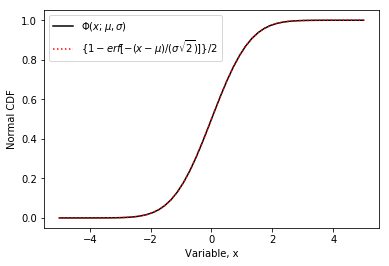

In [38]:
# import the essential methods
from scipy.special import erf

import matplotlib.pyplot as plt

# plot the two fucntions
plt.plot(x, norm.cdf(x, mu, sigma), 'k-', x, (1/2) * (1 - erf(-(x-mu)/(sigma*np.sqrt(2)))), 'r:')
# set the labels
plt.xlabel('Variable, x')
plt.ylabel('Normal CDF')
# plt.legend([r'$\Phi(x;\mu,\sigma)$', r'$\{1 - erf[-(x-\mu)/(\sigma\surd{2})]\}/2$'])
plt.legend([r'$\Phi(x;\mu,\sigma)$', '$\{1 - erf[-(x-\mu)/(\sigma\sqrt{2})]\}/2$'])

## 3.3 Confidence limits and error bars
Check (3.10) using normcdf.

In [39]:
one_sigma_frac = norm.cdf(mu+sigma, mu, sigma) - norm.cdf(mu-sigma, mu, sigma)
print(np.around(one_sigma_frac, decimals=4))

0.6827


Alternatively, use $\text{erf}$. The symmetry $\text{erf}{(x)} = \text{erf}{(-x)} $ allows simplification:

$$P = \Phi(\bar{x}+\sigma; \bar{x}, \sigma) - \Phi(\bar{x}-\sigma; \bar{x}, \sigma) =\text{erf}{(\frac{1}{\sqrt2})}$$

In [40]:

print(np.around(erf(1/np.sqrt(2)), decimals=4))

0.6827


### 3.3.1 Extended ranges
Check Table 3.1. 

In [61]:
range_in_sigma = [1, 1.65, 2, 2.58, 3]
frac_percent = erf(range_in_sigma/np.sqrt(2))*100
print(np.around(range_in_sigma, decimals=4), np.around(frac_percent, decimals=4))

[1.   1.65 2.   2.58 3.  ] [68.2689 90.1057 95.45   99.012  99.73  ]


### 3.3.2 Rejecting outliers
### 3.3.3 Experimental example of a Gaussian distribution
### 3.3.4 Comparing experimental results with an accepted value
### Poisson probability function for discrete events 

The Scipy function poisson.pmf returns the Poisson distribution function.
Reproduce Fig. 3.5.

Text(7.5, 0.3, '(a)')

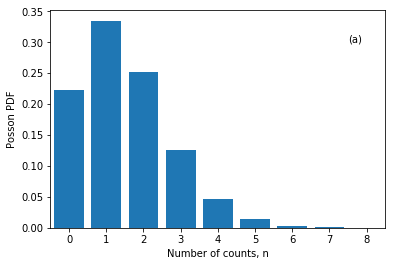

In [63]:
from scipy.stats import poisson
# define variables
n = range(8)
n_bar = 1.5
# generate a Poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)
plt.xlim([-0.5, 8.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(7.5, 0.3, '(a)')

Text(37, 0.08, '(b)')

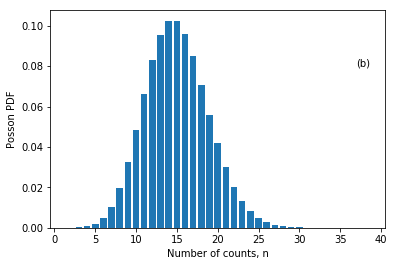

In [43]:
# define variables
n = range(40)
n_bar = 15
# generate a poisson distribution
p = poisson.pmf(n, n_bar)

plt.bar(n, p)

plt.xlim([-0.5, 40.5])
plt.xlabel('Number of counts, n')
plt.ylabel('Posson PDF')
plt.text(37, 0.08, '(b)')

### 3.4.1 Worked example - Poisson counts
### 3.4.2 Error bars and confidence limits for Poisson statistics
### 3.4.3 Approximations for higher means
### 3.5 The central limit theorem
### 3.5.1 Examples of the central limit theorem
Reproduce the top row of Fig. 3.7. The left-most plot is the PDF for a uniform distribution over (0,1).

Text(0, 0.5, 'Probability Density, f(x)')

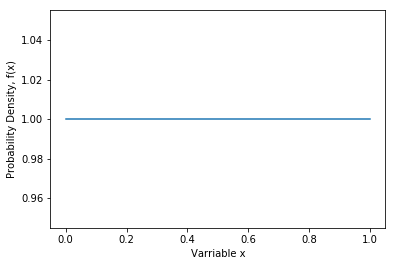

In [44]:
x_var = np.linspace(0, 1, 100)
f = np.ones(x_var.shape)

plt.plot(x_var, f)
plt.xlabel('Varriable x')
plt.ylabel('Probability Density, f(x)')

The center plot is a histogram of 1000 trials.

Text(0, 0.5, 'Occurrence')

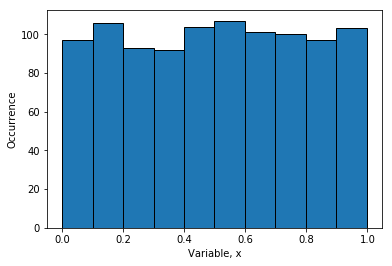

In [45]:
np.random.seed(1)

x = np.random.rand(1000)

plt.hist(x, 10, ec='black')
plt.xlabel('Variable, x')
plt.ylabel('Occurrence')

The right-most plot is a histogram of 1000 trials, where the result of each trial is the mean of five numbers drawn from the uniform distribution. To simplify the computation, note that the mean function operates independently on the columns of an array.

Text(0, 0.5, 'Occurrence')

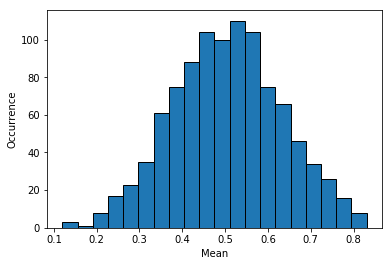

In [64]:
# generage a 5 x 1000 matrix of random numbers
x = np.random.rand(5, 1000)
# calulate the mean value of each column
x_bar = np.mean(x, axis=0)

plt.hist(x_bar, 20, ec='black')
plt.xlabel('Mean')
plt.ylabel('Occurrence')

Let's look at how this evolves from N=2 to N=5, using 10,000 trials to get better statistics.

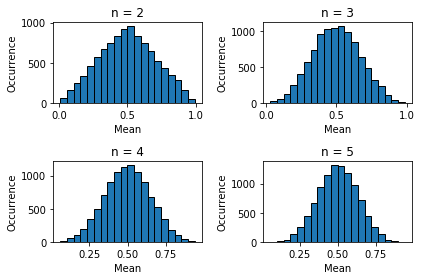

In [47]:
n_start = 2
n_end = 5 + 1
trials = 10000


for i in range(n_start, n_end):

    plt.subplot(2, 2, i - n_start  + 1)

    x = np.random.rand(i, trials)
    x_bar = np.mean(x, axis=0)

    plt.hist(x_bar, 20, ec='black')
    plt.xlabel('Mean')
    plt.ylabel('Occurrence')
    plt.title('n = ' + str(i))
# adjust spacing between subplots to minimize the overlaps
plt.tight_layout()



### Exercises
#### 1 - Exercise (3.2)
#### 2 - Exercise (3.5)
#### 3 - Exercise (3.8)